# Tarea 2

In [68]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import qexpy as q
from scipy import integrate

1.

In [69]:
def System(r,t,beta,gamma):
    
    dsdt = -beta*r[0]*r[1]
    didt =  beta*r[0]*r[1] - gamma*r[1]
    
    return [dsdt,didt]

In [70]:
def f0(S,I,beta,gamma):
    return -beta*S*I

def f1(S,I,beta,gamma):
    return beta*S*I - gamma*I

In [71]:
r0 = [1000,1]
beta = 0.002
gamma = 0.5
t = np.linspace(0,30,100)
r = integrate.odeint( System, r0, t, args=(beta,gamma) )

In [72]:
# Orden 3
def GetEuler3System(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3=np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        #x_n =S[i-1] y_n=I[i-1]  h=K1[0]*h    
        
        K2[0] = f0(S[i-1]+(1/2)*h*K1[0],I[i-1]+(1/2)*h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1]+(1/2)*h*K1[0],I[i-1]+(1/2)*h*K1[1],beta,gamma)
        
        K3[0]= f0(S[i-1]+h*K1[0],I[i-1]-h*K1[1]+2*h*K2[1],beta,gamma)
        K3[1]= f1(S[i-1]+h*K1[0],I[i-1]-h*K1[1]+2*h*K2[1],beta,gamma)
        
        
        S[i] = S[i-1] + (1/6)*h*(K1[0]+4*K2[0]+K3[0])
        I[i] = I[i-1] + (1/6)*h*(K1[1]+4*K2[1]+K3[1])
        
    return S,I

In [73]:
#Orden 4
def GetEuler4System(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        #x_n =S[i-1] y_n=I[i-1]  h=K1[0]*h    
        
        K2[0] = f0(S[i-1]+(1/2)*h*K1[0],I[i-1]+(1/2)*h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1]+(1/2)*h*K1[0],I[i-1]+(1/2)*h*K1[1],beta,gamma)
        
        K3[0] = f0(S[i-1]+(1/2)*h*K1[0],I[i-1]+(1/2)*h*K2[1],beta,gamma)
        K3[1] = f1(S[i-1]+(1/2)*h*K1[0],I[i-1]+(1/2)*h*K2[1],beta,gamma)
        
        K4[0] = f0(S[i-1]+h*K1[0], I[i-1]+h*K3[1],beta,gamma)
        K4[1] = f1(S[i-1]+h*K1[0], I[i-1]+h*K3[1],beta,gamma)
        
        S[i] = S[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+ K4[0])
        I[i] = I[i-1] + (1/6)*h*(K1[1]+2*K2[1]+2*K3[1]+ K4[1])
        
    return S,I

In [74]:
S3,I3 = GetEuler3System(f0,f1,r0,t)
S4,I4 = GetEuler4System(f0,f1,r0,t)

In [75]:
plt.plot(t,np.abs(r[:,0]-S3),label="S3")
plt.plot(t,np.abs(r[:,1]-I3),label="I3")
plt.plot(t,np.abs(r[:,0]-S4),label="S4")
plt.plot(t,np.abs(r[:,1]-I4),label="I4")
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


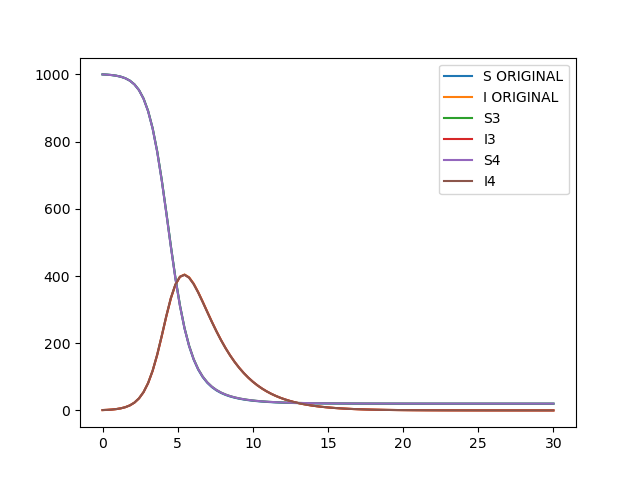

In [67]:
plt.plot(t,r[:,0],label="S ORIGINAL")
plt.plot(t,r[:,1],label="I ORIGINAL")
plt.plot(t,S3,label='S3')
plt.plot(t,I3,label='I3')
plt.plot(t,S4,label='S4')
plt.plot(t,I4,label='I4')
plt.legend()

Como se evidencia en la gráfica anterior, los algoritmos de Runge-Kutta de tercer y cuerto orden se aproximan bastante a la gráfica original.

2.

a)

b)

c)

d)

e)

3.

4.

5.

6.